# Climate Analysis & Exploration using Precipitation, Temperature for stations.

In [1]:
# Import Dependencies

# Import Sqlalchemy
import sqlalchemy
# Import the column types necessary that is being used in the database
from sqlalchemy import Column, Integer, String, Float

# Import automap base
from sqlalchemy.ext.automap import automap_base
# Import Session
from sqlalchemy.orm import Session
# Imports the method used for connecting and inspecting DB
from sqlalchemy import create_engine,inspect
# Import func from sqlalchemy to count
from sqlalchemy import func
# Import desc from sqlalchemy to order the records in descending order
from sqlalchemy import desc

# Import Pandas
import pandas as pd
# Import numpy
import numpy as np
# Import datetime 
import datetime as dt

# Import matplotlib,pyplot and the seaborn style in matplotlib
import matplotlib
# from matplotlib import style
# style.use('seaborn')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Connect to your sqlite database using sqlalchemy create_engine.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model 
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
# "keys" refers to the table names found by automap present in the class 
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
Session = Session(engine)

In [7]:
#"inspect" delivers runtime information about a wide variety of SQLAlchemy objects
Inspect = inspect(engine)

### Basic Data engineering task

In [8]:
#To get the table names, we use get_table_names function from inspect
Inspect.get_table_names()

['measurement', 'station']

In [9]:
#To get the column details, we use get_column function from inspect
columns_measurement = Inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns_station = Inspect.get_columns('station')
for cols in columns_station:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Data Engineering Tasks 
* Checking the data for NULL, incorrect or missing values.
* Fixing the data either by substituting the above kind of data 
* Performing the above steps for 'measurement' as well as 'station' table and making it fit for use.

In [11]:
Result = Session.execute("SELECT count(*) FROM Measurement").fetchall()
print(Result)

[(19550,)]


In [12]:
Result = Session.execute("SELECT count(*) FROM Station").fetchall()
print(Result)

[(9,)]


In [21]:
Result = Session.execute("SELECT count(*) FROM Measurement WHERE station is Null").fetchall()
print(Result)

[(0,)]


In [20]:
Result = Session.execute("SELECT count(*) FROM Measurement WHERE date is Null").fetchall()
print(Result)

[(0,)]


In [17]:
Result = Session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Result)

[(1447,)]


In [19]:
Result = Session.execute("SELECT count(*) FROM Measurement WHERE tobs is Null").fetchall()
print(Result)

[(0,)]


In [22]:
Result = Session.execute("SELECT count(*) FROM Station WHERE station is Null").fetchall()
print(Result)

[(0,)]


In [23]:
Result = Session.execute("SELECT count(*) FROM Station WHERE name is Null").fetchall()
print(Result)

[(0,)]


In [24]:
Result = Session.execute("SELECT count(*) FROM Station WHERE latitude is Null").fetchall()
print(Result)

[(0,)]


In [25]:
Result = Session.execute("SELECT count(*) FROM Station WHERE longitude is Null").fetchall()
print(Result)

[(0,)]


In [26]:
Result = Session.execute("SELECT count(*) FROM Station WHERE elevation is Null").fetchall()
print(Result)

[(0,)]


In [27]:
#Observation: The 'Measurement' table is 1447 occurences of Null values or None values for "prcp".

In [28]:
#Update the 'Measurement' table and subsitute the "prcp" with 0.0 where there is Null values or None values

Session.execute("Update Measurement SET prcp=0.0 WHERE prcp is NULL")

In [35]:
Session.commit()

In [36]:
Result = Session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Result)

[(0,)]


## Exploratory Climate Analysis

### Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.
* Select only the date and prcp values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Plot the results using the DataFrame plot method.

In [37]:
#Step 1: Get the latest date
##Method 1: Using session.execute
Latest_date = Session.execute("SELECT MAX(date) FROM Measurement").fetchall()
#print(Latest_date)
##Method 2: Using session.query
Latest_date = Session.query(func.max(Measurement.date)).all()
#print(Latest_date)
End_Date = Latest_date[0][0]
print(End_Date)

2017-08-23


In [38]:
#Step 2: Get the year old date (Last year)
Struct = dt.date.today()
End_Date_dateformat = Struct.replace(year=int(End_Date[:4]),month=int(End_Date[5:7]),day=int(End_Date[8:]))
Last_date_year = End_Date_dateformat - dt.timedelta(days=365)    
Start_Date = Last_date_year.strftime("%Y-%m-%d")
print(Start_Date)

2016-08-23


In [39]:
print("Date range is starting from {} and ending at {}".format(Start_Date,End_Date))

Date range is starting from 2016-08-23 and ending at 2017-08-23


In [40]:
#Step 3: Perform a query to get the precipitation data for 1 year(as per the DB) (In desc order of date)
PRCP_data = Session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= End_Date)\
                          .filter(Measurement.date >= Start_Date)\
                          .order_by(Measurement.date.desc()).all()
# for data in PRCP_data: 
#     print(data)

In [41]:
#Step 4: Save the query results as a Pandas DataFrame and set the index to the date column
PRCP_data_DF = pd.DataFrame(PRCP_data).rename(columns={"date":"Date","prcp":"Precipitation Score"})
PRCP_data_DF.set_index("Date",inplace=True)
PRCP_data_DF.head()

,Precipitation Score
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


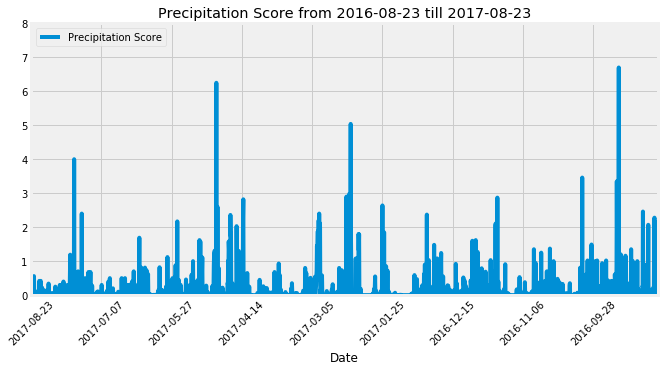

In [42]:
#Step 5: Plot the results using the DataFrame plot method.
PRCP_data_DF.plot(figsize=(10,5),ylim=(0,8),title=f'Precipitation Score from {Start_Date} till {End_Date}',\
                  label="Precipitation",rot=45)
plt.legend(loc="upper left")
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PRCP_data_DF.describe()

,Precipitation Score
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis
* Design a query to calculate the total number of stations.
* Design a query to find the most active stations.
* List the stations and observation counts in descending order
* Which station has the highest number of observations?
* Design a query to retrieve the last 12 months of temperature observation data (tobs).
* Filter by the station with the highest number of observations.
* Plot the results as a histogram with bins=12.

In [44]:
#Step1: Query to find the count the number of stations

#Method 1: Using session.execute and new f-string formatting for printing
# Total_stations = Session.execute("Select count(*) from Station").fetchall()
# print(f'Total number of stations is: {Total_stations[0][0]}')

# #Method 2: Using session.query and new-style string formatting
Total_stations = Session.query(Station).count()
print('Total number of stations is: {}'.format(Total_stations))

Total number of stations is: 9


In [45]:
Most_Active_stations = Session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)\
                                     .order_by(desc(func.count(Measurement.station))).all()

In [46]:
#Step2: Query to count the stations and observation counts of each active station

# #Method 1: Using session.execute
# Most_Active_stations = Session.execute("Select station as Station_id,count(station)\
#                                         as Num_of_Obs from Measurement\
#                                         group by station order by 2 desc")\
#                                         .fetchall()
# print("**Using session.execute**")
# for all in Most_Active_stations:
#     print(all)

#Method 2: Using session.query
Most_Active_stations = Session.query(Measurement.station,func.count(Measurement.station))\
                                     .group_by(Measurement.station)\
                                     .order_by(desc(func.count(Measurement.station))).all()
#print("\n**Using session.query**")

In [47]:
#Step3: List the stations and the counts in descending order.
print("Rank\tStation ID\tObservations")
i = 1
for active_stations in Most_Active_stations:
    print("%d\t%s\t%d" %(i,active_stations[0],active_stations[1]))
    i+=1

Rank	Station ID	Observations
1	USC00519281	2772
2	USC00519397	2724
3	USC00513117	2709
4	USC00519523	2669
5	USC00516128	2612
6	USC00514830	2202
7	USC00511918	1979
8	USC00517948	1372
9	USC00518838	511


In [48]:
#Step4: Query to find out the station having the highest number of obseravtions.
#Method 1
# Station_Highest_Obs = Session.execute("Select station,count(station) from \
#                                        Measurement\
#                                        group by station\
#                                        order by 2 desc limit(1)").fetchall()
# print("Using session.execute and passing the values in tuple**")
# for all in Station_Highest_Obs: 
#     print("The station with highest number of observations is %s with %d number\
#          of observations" %(all[0],all[1]))

#Method 2
Station_Highest_Obs = Session.query(Measurement.station,func.count(Measurement.station))\
                      .group_by(Measurement.station)\
                      .order_by(desc(func.count(Measurement.station))).first()
#print("\n**Using session.query and concatenating strings for printing**")
#Station_Highest_Obs  
print("The station with the highest number of observation is "+str(Station_Highest_Obs[0])+" with " +\
      str(Station_Highest_Obs[1]) + " number of observations.")

The station with the highest number of observation is USC00519281 with 2772 number of observations.


In [49]:
#Step5: Query to calculate the lowest temperature recorded, highest temperature recorded, \
# and average temperature for the most active station.
Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station_Highest_Obs[0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [50]:
#Step6: Query the last 12 months of temperature observation data for this station 
Results = Session.query(Measurement.date,Measurement.station,Measurement.tobs)\
             .filter(Measurement.date >= Start_Date).filter(Measurement.date<=End_Date)\
             .filter(Measurement.station == Station_Highest_Obs[0]).order_by(desc(Measurement.date)).all()
# print("Date\t\tStation ID\tTemperature Recorded")
# for each in Results:
#     print(f"{each[0]}\t{each[1]}\t{each[2]}")

In [51]:
#Step7:(Intermediate) Creating a Dataframe with the above results
Last12_tobs_DF = pd.DataFrame(Results,columns=["Date","Station ID","Temperature_Recorded"])
Last12_tobs_DF.head()

,Date,Station ID,Temperature_Recorded
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0


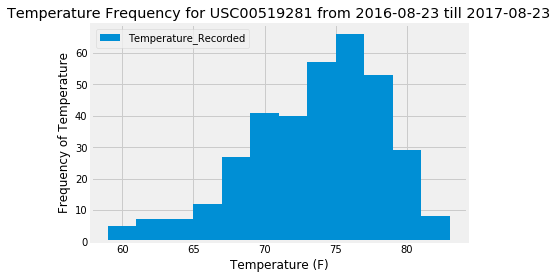

In [52]:
#Step8: Plot the results as a histogram
#plt.hist(by=Last12_tobs_DF["Temperature_Recorded"],bins=12,label="tobs")
Last12_tobs_DF.plot.hist(by="Temperature_Recorded",bins=12,label="tobs",title=f'Temperature Frequency for {Station_Highest_Obs[0]} from {Start_Date} till {End_Date}')
plt.ylim=(0,80)
plt.ylabel("Frequency of Temperature")
plt.xlabel("Temperature (F)")
#plt.title=(f'Temperature Frequency for {Station_Highest_Obs[0]} from {Start_Date} till {End_Date}')
plt.legend=()
#plt.title=("Temperature Frequency for {} from {} till {}".format(Station_Highest_Obs[0],Start_Date,End_Date))
plt.show()

### Temperature Analysis (Optional)
* The function calc_temps accepts a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
* Using the calc_temps function calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
* Plot the min, avg, and max temperature from your previous query as a bar chart.
* Use the average temperature as the bar height.
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr). 

In [53]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return Session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#print(calc_temps('2012-02-28', '2012-03-05'))

In [54]:
#Step1: Calculate previous year's date based on the current trip start & end dates
Trip_start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
Trip_end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")

Enter the trip start date in 'YYYY-MM-DD' format: 2018-07-04
Enter the trip end date in 'YYYY-MM-DD' format: 2018-07-15


In [55]:
#Step2: Calculate the previous year's dates based on the input dates
Struct = dt.date.today()
Trip_start_date_dateformat = Struct.replace(year=int(Trip_start_date[:4]),month=int(Trip_start_date[5:7]),day=int(Trip_start_date[8:]))
Previous_Trip_start_date = Trip_start_date_dateformat - dt.timedelta(days=365)
Previous_Trip_start_date = Previous_Trip_start_date.strftime("%Y-%m-%d")
Previous_Trip_start_date
Trip_end_date_dateformat = Struct.replace(year=int(Trip_end_date[:4]),month=int(Trip_end_date[5:7]),day=int(Trip_end_date[8:]))
Previous_Trip_end_date = Trip_end_date_dateformat - dt.timedelta(days=365)
Previous_Trip_end_date = Previous_Trip_end_date.strftime("%Y-%m-%d")
Previous_Trip_end_date

'2017-07-15'

In [56]:
#Step2: Call the function 'calc_temps' to calculate the tmin, tavg, and tmax for previous year's date
Result = calc_temps(Previous_Trip_start_date, Previous_Trip_end_date)
print(Result)

[(69.0, 78.11842105263158, 82.0)]


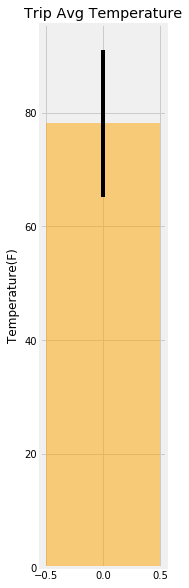

In [68]:
#Step3: Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = Result[0][0]
tavg = Result[0][1]
tmax = Result[0][2]
y_err = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0,tavg,yerr=y_err,align="center",width=1,color="orange",alpha=0.5)
plt.ylim=(0,120)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temperature")
plt.show()

In [78]:
#Step4:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
Results = Session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")
for each in Results: print(each[0],"\t",each[1])                       

Station Id	Total Rainfall
USC00516128 	 1.87
USC00519281 	 1.26
USC00513117 	 0.5900000000000001
USC00514830 	 0.39
USC00519397 	 0.13
USC00519523 	 0.11
USC00517948 	 0.0


In [70]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = Session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>=Previous_Trip_start_date).filter(Measurement.date<=Previous_Trip_end_date)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# print("Station\t\tStation_Name\t\tRainfall\tLatitude\tLongitude\tTemperature")
# for result in Results: print(result[0],"\t",result[1],"\t",result[2],"\t\t",result[3],"\t",result[4],"\t",result[5])

for result in Results: print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 1.87, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 1.26, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 0.5900000000000001, 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.39, 21.5213, -157.8374, 7.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.13, 21.2716, -157.8168, 3.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.11, 21.33556, -157.71139, 19.5)
('USC00517948', 'PEARL CITY, HI US', 0.0, 21.3934, -157.9751, 11.9)
